In [21]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [8]:
# Passo 1: Criar dados simulados CORRETAMENTE
np.random.seed(42)
n = 50  # Número de observações

# Gerar variáveis independentes primeiro
desconto = np.random.uniform(5, 20, n)  # Desconto de 5% a 20%
frequencia = np.random.randint(1, 10, n)  # 1 a 9 e-mails/semana

# Calcular a resposta (taxa de conversão) com uma relação não-linear
taxa_resposta = 0.1 + 0.02 * desconto - 0.01 * frequencia**2 + np.random.normal(0, 0.01, n)

# Criar DataFrame
df_rsm = pd.DataFrame({
    'desconto': desconto,
    'frequencia': frequencia,
    'taxa_resposta': taxa_resposta
})

In [11]:
# Passo 2: Ajustar modelo de superfície de resposta
X = df_rsm[['desconto', 'frequencia']]
y = df_rsm['taxa_resposta']

# Adicionar termos quadráticos e de interação
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)  # Inclui x1, x2, x1², x2², x1*x2

modelo_rsm = LinearRegression()
modelo_rsm.fit(X_poly, y)

LinearRegression()

In [17]:
# Passo 3: Prever e encontrar o ótimo
df_rsm['predito'] = modelo_rsm.predict(X_poly)
melhor_combinacao = df_rsm.loc[df_rsm['predito'].idxmax()]

In [18]:
melhor_combinacao

desconto         19.484480
frequencia        1.000000
taxa_resposta     0.498551
predito           0.487779
Name: 34, dtype: float64

In [19]:
print("Melhor combinação para máxima taxa de resposta:")
print(f"- Desconto: {melhor_combinacao['desconto']:.2f}%")
print(f"- Frequência de e-mails: {melhor_combinacao['frequencia']}/semana")
print(f"- Taxa de resposta prevista: {melhor_combinacao['predito']:.4f}")

Melhor combinação para máxima taxa de resposta:
- Desconto: 19.48%
- Frequência de e-mails: 1.0/semana
- Taxa de resposta prevista: 0.4878


In [23]:
# Passo 3: Gerar grid para visualização
desconto_grid = np.linspace(5, 20, 20)
frequencia_grid = np.linspace(1, 9, 20)
D, F = np.meshgrid(desconto_grid, frequencia_grid)  # Definindo D e F aqui!
X_grid = np.column_stack([D.ravel(), F.ravel()])
X_grid_poly = poly.transform(X_grid)
Z = modelo_rsm.predict(X_grid_poly).reshape(D.shape)

c:\Users\marco.aragon\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


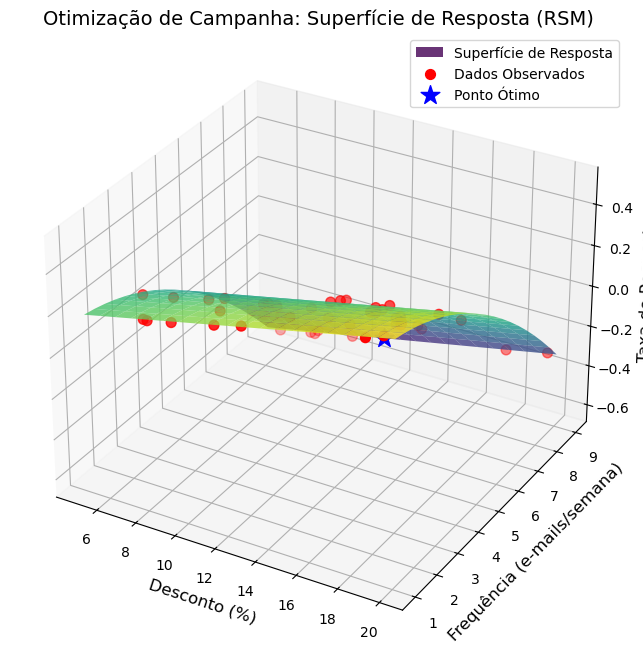

In [24]:
# Configurar o gráfico 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotar a superfície de resposta
surf = ax.plot_surface(D, F, Z, cmap='viridis', alpha=0.8, label='Superfície de Resposta')

# Plotar os dados reais (pontos vermelhos)
ax.scatter(df_rsm['desconto'], df_rsm['frequencia'], df_rsm['taxa_resposta'], 
           c='red', s=50, label='Dados Observados')

# Destacar o ponto ótimo (azul)
ax.scatter(melhor_combinacao['desconto'], melhor_combinacao['frequencia'], melhor_combinacao['predito'], 
           c='blue', s=200, marker='*', label='Ponto Ótimo')

# Ajustar labels e título
ax.set_xlabel('Desconto (%)', fontsize=12)
ax.set_ylabel('Frequência (e-mails/semana)', fontsize=12)
ax.set_zlabel('Taxa de Resposta', fontsize=12)
ax.set_title('Otimização de Campanha: Superfície de Resposta (RSM)', fontsize=14)
ax.legend()

plt.show()

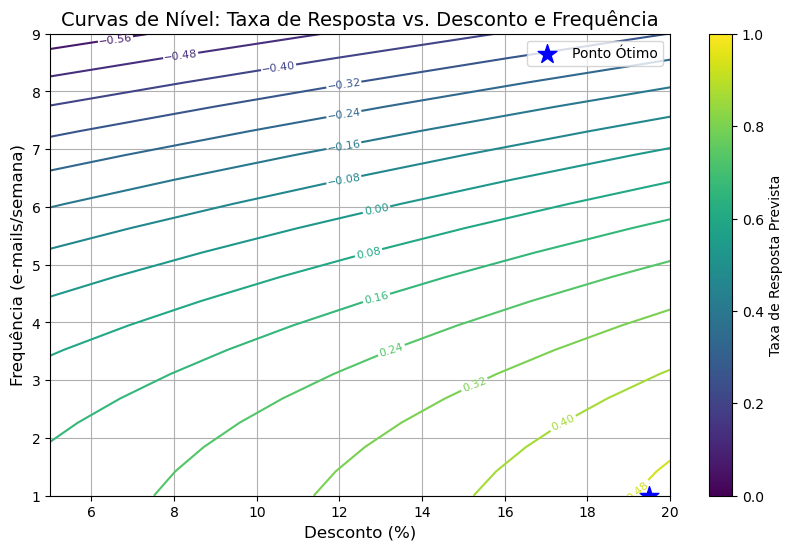

In [25]:
# Configurar o gráfico de contorno
plt.figure(figsize=(10, 6))
contour = plt.contour(D, F, Z, levels=15, cmap='viridis')
plt.clabel(contour, inline=True, fontsize=8)

# Plotar o ponto ótimo
plt.scatter(melhor_combinacao['desconto'], melhor_combinacao['frequencia'], 
            c='blue', s=200, marker='*', label='Ponto Ótimo')

# Ajustar labels e título
plt.xlabel('Desconto (%)', fontsize=12)
plt.ylabel('Frequência (e-mails/semana)', fontsize=12)
plt.title('Curvas de Nível: Taxa de Resposta vs. Desconto e Frequência', fontsize=14)
plt.colorbar(label='Taxa de Resposta Prevista')
plt.legend()
plt.grid(True)

plt.show()

c:\Users\marco.aragon\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


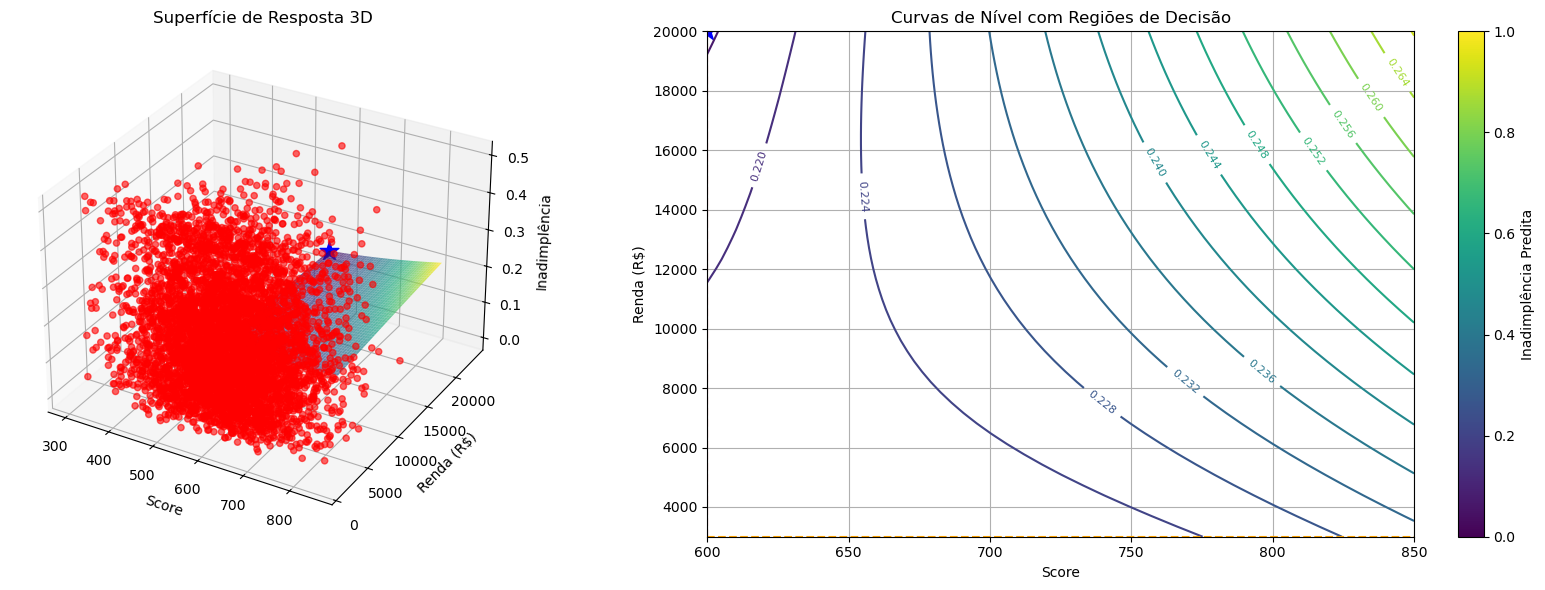


------------ RESULTADOS DA OTIMIZAÇÃO ------------
Combinação ótima: Score = 600, Renda = R$20000.00
Taxa de inadimplência prevista: 21.55%

Distribuição original da inadimplência:
count    5000.000000
mean        0.224437
std         0.138825
min         0.001000
25%         0.108855
50%         0.202399
75%         0.318083
max         0.500000

Exemplos de simulação:
REPROVADO (Inad: 22.27%, Score: 700, Renda: R$5000.00)
REPROVADO (Inad: 22.39%, Score: 550, Renda: R$4000.00)
REPROVADO (Inad: 26.10%, Score: 800, Renda: R$25000.00)


c:\Users\marco.aragon\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\marco.aragon\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\marco.aragon\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [35]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ======================
# 1. GERAÇÃO DE DADOS
# ======================
np.random.seed(42)

# Número de observações
n = 5000

# Gerando dados simulados
dados = {
    # Score com distribuição normal (média 600, desvio padrão 100)
    'score': np.random.normal(loc=600, scale=100, size=n).astype(int),
    
    # Renda com distribuição gamma (assimétrica positiva)
    'renda': np.round(np.random.gamma(shape=2, scale=2000, size=n), 2),
    
    # Taxa de inadimplência relacionada inversamente ao score
    'inadimplencia': np.random.beta(a=1.5, b=5, size=n)
}

# Criando o DataFrame
df = pd.DataFrame(dados)

# Ajustando valores para ficarem em intervalos realistas
df['score'] = df['score'].clip(300, 850)  # Limitando score entre 300-850
df['renda'] = df['renda'].clip(1000, 50000)  # Renda entre 1.000 e 50.000
df['inadimplencia'] = df['inadimplencia'].clip(0.001, 0.5)  # Taxa entre 0.1% e 50%

# ======================
# 2. MODELAGEM RSM
# ======================
X = df[["score", "renda"]]
y = df["inadimplencia"]

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)
df["inadimplencia_predita"] = model.predict(X_poly)

# ======================
# 3. OTIMIZAÇÃO
# ======================
score_min, renda_min = 600, 3000  # Limites mínimos

score_grid = np.linspace(score_min, 850, 50)
renda_grid = np.linspace(renda_min, 20000, 50)
S, R = np.meshgrid(score_grid, renda_grid)

X_grid = np.column_stack([S.ravel(), R.ravel()])
Z = model.predict(poly.transform(X_grid)).reshape(S.shape)

optimal_idx = np.argmin(Z)
optimal_score, optimal_renda = S.ravel()[optimal_idx], R.ravel()[optimal_idx]
optimal_inad = Z.ravel()[optimal_idx]

# ======================
# 4. VISUALIZAÇÃO
# ======================
plt.figure(figsize=(18, 6))

# Gráfico 3D
ax1 = plt.subplot(1, 2, 1, projection='3d')
ax1.plot_surface(S, R, Z, cmap='viridis', alpha=0.7)
ax1.scatter(df["score"], df["renda"], df["inadimplencia"], c='red', s=20, alpha=0.6)
ax1.scatter(optimal_score, optimal_renda, optimal_inad, c='blue', s=200, marker='*')
ax1.set_xlabel('Score')
ax1.set_ylabel('Renda (R$)')
ax1.set_zlabel('Inadimplência')
ax1.set_title('Superfície de Resposta 3D')

# Gráfico de Contorno
plt.subplot(1, 2, 2)
contour = plt.contour(S, R, Z, levels=15, cmap='viridis')
plt.clabel(contour, inline=True, fontsize=8)
plt.scatter(optimal_score, optimal_renda, c='blue', s=200, marker='*')
plt.axvline(score_min, color='red', linestyle='--')
plt.axhline(renda_min, color='orange', linestyle='--')
plt.xlabel('Score')
plt.ylabel('Renda (R$)')
plt.title('Curvas de Nível com Regiões de Decisão')
plt.colorbar(label='Inadimplência Predita')
plt.grid(True)

plt.tight_layout()
plt.show()

# ======================
# 5. RESULTADOS
# ======================
print(f"\n{' RESULTADOS DA OTIMIZAÇÃO ':-^50}")
print(f"Combinação ótima: Score = {optimal_score:.0f}, Renda = R${optimal_renda:.2f}")
print(f"Taxa de inadimplência prevista: {optimal_inad:.2%}")

print("\nDistribuição original da inadimplência:")
print(df["inadimplencia"].describe().to_string())

# Função de simulação
def simular_aprovacao(score, renda, limiar=0.1):
    prob = model.predict(poly.transform([[score, renda]]))[0]
    status = "APROVADO" if (score >= score_min) and (renda >= renda_min) and (prob <= limiar) else "REPROVADO"
    return f"{status} (Inad: {prob:.2%}, Score: {score}, Renda: R${renda:.2f})"

print("\nExemplos de simulação:")
print(simular_aprovacao(700, 5000))
print(simular_aprovacao(550, 4000))
print(simular_aprovacao(800, 25000))